In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import mglearn

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [9]:
dataset_train_df = pd.read_csv('../data/scenarios/scenario4.csv')
dataset_test_df = pd.read_csv('../data/scenarios/scenario4_test.csv')

dataset_train_df = dataset_train_df.sample(frac=1).reset_index(drop=True)
dataset_test_df = dataset_test_df.sample(frac=1).reset_index(drop=True)

In [10]:
x_train = dataset_train_df.iloc[:, 1:-1].values
y_train = dataset_train_df.iloc[:, -1].values

x_test = dataset_test_df.iloc[:, 1:-1].values
y_test = dataset_test_df.iloc[:, -1].values

In [11]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1000) # Linear Kernel

#Train the model using the training sets
result = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [13]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


<Figure size 432x288 with 0 Axes>

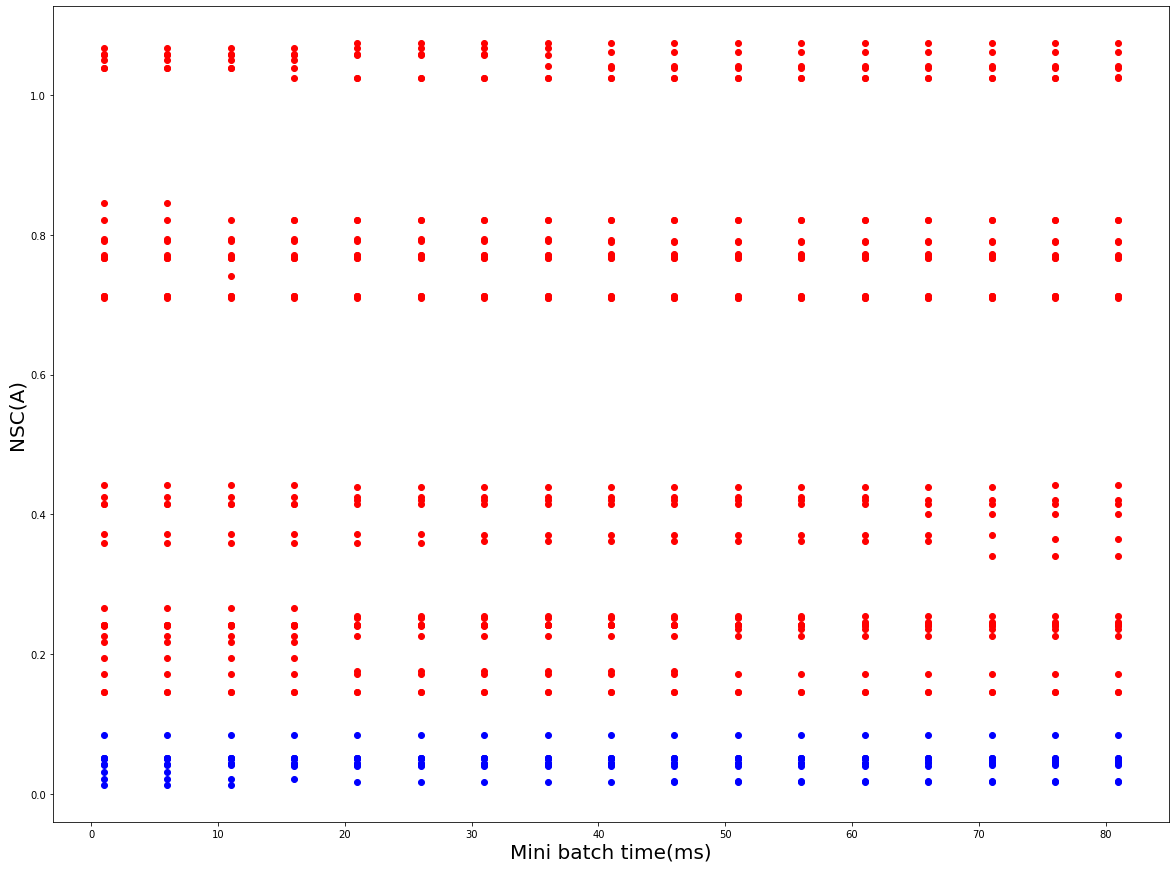

In [14]:
# train data classification plot(with dicision surface, support vector)
plt.figure(3)
plt.figure(figsize=(20, 15))
# plt.title("SVM-train data Classification")
plt.xlabel("Mini batch time(ms)", fontsize=20)
plt.ylabel("NSC(A)", fontsize=20)
predict1 = clf.predict(x_train)
predict1 = predict1.astype(float)
x_scale = np.linspace(1, 83, 83)
for i in range(50):
    if predict1[i] == 0:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_train[i][j], color='blue')
    if predict1[i] == 1:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_train[i][j], color='red')

<Figure size 432x288 with 0 Axes>

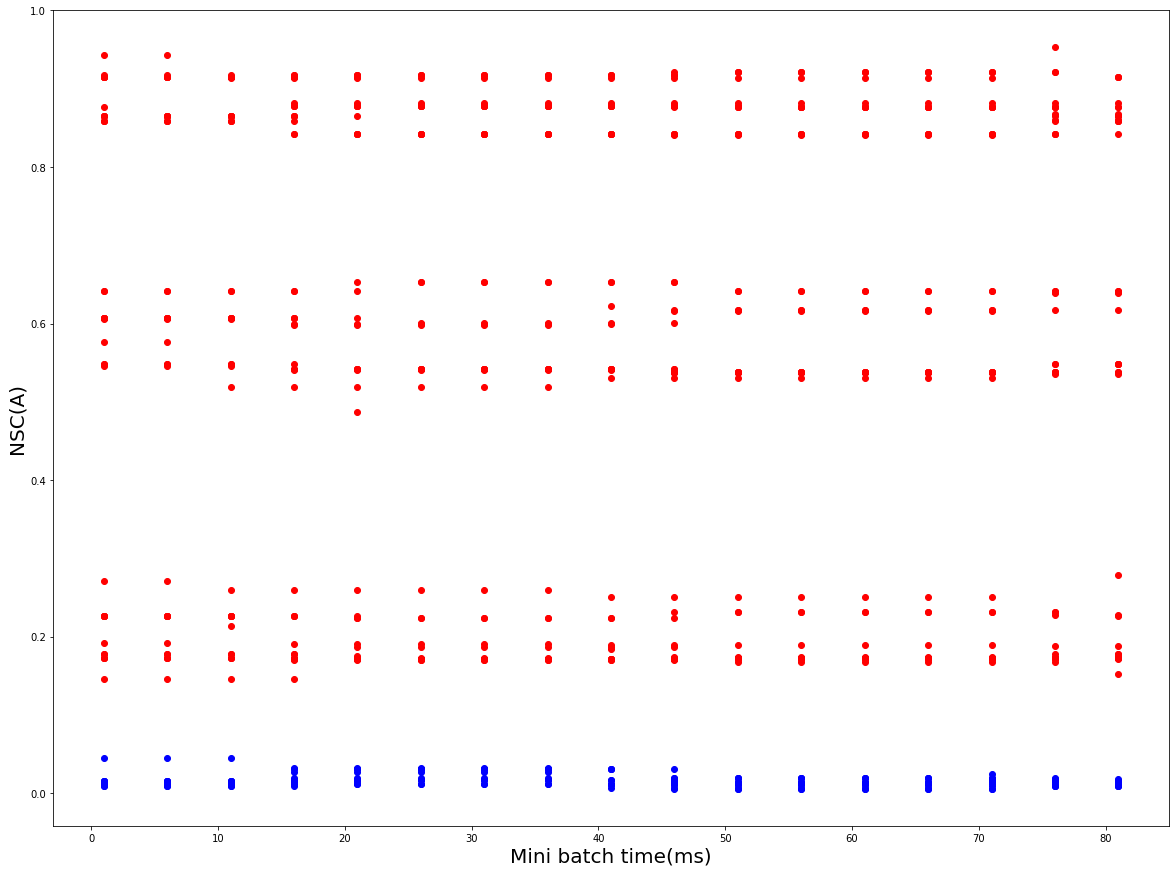

In [8]:
# test data classification plot(with dicision surface, support vector)
plt.figure(3)
plt.figure(figsize=(20, 15))
# plt.title("SVM-test data Classification")
plt.xlabel("Mini batch time(ms)", fontsize=20)
plt.ylabel("NSC(A)", fontsize=20)
predict1 = clf.predict(x_test)
predict1 = predict1.astype(float)
x_scale = np.linspace(1, 83, 83)
for i in range(50):
    if predict1[i] == 0:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_test[i][j], color='blue')
    if predict1[i] == 1:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_test[i][j], color='red')